# DCGAN by TENSORFLOW

                                                                by KH(2018.11.17)

In [1]:
## importing
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [2]:
## setting parameter
epoch = 3
batch_size = 128
noise_dimension = 96
learning_rate = 0.001

In [3]:
## load mnist
mnist = input_data.read_data_sets("MNIST_data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
def discriminator(x):
    with tf.variable_scope("discriminator"):
        x = tf.reshape(x, [-1,28,28,1])
        conv1_d = tf.layers.conv2d(x,filters=32, kernel_size=(5,5), activation=tf.nn.leaky_relu)
        conv1_p_d = tf.nn.max_pool(conv1_d, ksize=(1,2,2,1), strides=(1,2,2,1), padding='VALID')
        conv2_d = tf.layers.conv2d(conv1_p_d,filters=64, kernel_size=(5,5), activation=tf.nn.leaky_relu)
        conv2_p_d = tf.nn.max_pool(conv2_d, ksize=(1,2,2,1), strides=(1,2,2,1), padding='VALID')
        f_d = tf.layers.flatten(conv2_p_d)
        fc_d = tf.layers.dense(f_d,4*4*64, activation=tf.nn.leaky_relu)
        logits = tf.layers.dense(fc_d,1)
        return logits

In [5]:
def generator(z):
    with tf.variable_scope("generator"):
        l1_g = tf.layers.dense(z, 1024, activation=tf.nn.leaky_relu)
        l1_n_g = tf.layers.batch_normalization(l1_g, training=True)
        l2_g = tf.layers.dense(l1_n_g,7*7*128, activation=tf.nn.leaky_relu)
        l2_n_g = tf.layers.batch_normalization(l2_g, training=True)
        l2_n_g = tf.reshape(l2_n_g,[-1,7,7,128])
        conv1_g = tf.layers.conv2d_transpose(l2_n_g, filters=64, kernel_size=(4,4), strides=2, padding='SAME', activation=tf.nn.relu)
        conv1_n_g = tf.layers.batch_normalization(conv1_g, training=True)
        conv2_g = tf.layers.conv2d_transpose(conv1_n_g, filters=1, kernel_size=(4,4), strides=2, padding='SAME')
        img = tf.nn.tanh(conv2_g)
        return img

In [6]:
def gan_loss(logits_real, logits_fake):
    D_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(logits_real), logits=logits_real))+\
                            tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(logits_fake), logits=logits_fake))
    G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(logits_fake), logits=logits_fake))
    
    return D_loss, G_loss

In [7]:
tf.reset_default_graph()
X = tf.placeholder(shape=[None, 784], dtype=tf.float32)
z = tf.random_normal([batch_size, noise_dimension],-1,1)
G = generator(z)

with tf.variable_scope("") as scope:
    D_X = discriminator(X)
    scope.reuse_variables()
    D_G = discriminator(G)

D_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'discriminator')
G_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'generator')    


D_opt = tf.train.AdamOptimizer(learning_rate)
G_opt = tf.train.AdamOptimizer(learning_rate)

D_loss, G_loss = gan_loss(D_X, D_G)

D_train_step = D_opt.minimize(D_loss, var_list=D_vars)
G_train_step = G_opt.minimize(G_loss, var_list=G_vars)



D_loss: 0.23007442800345504, G_loss: 4.693619398803977


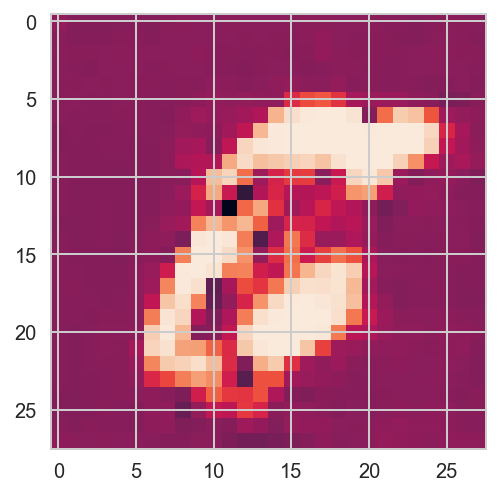

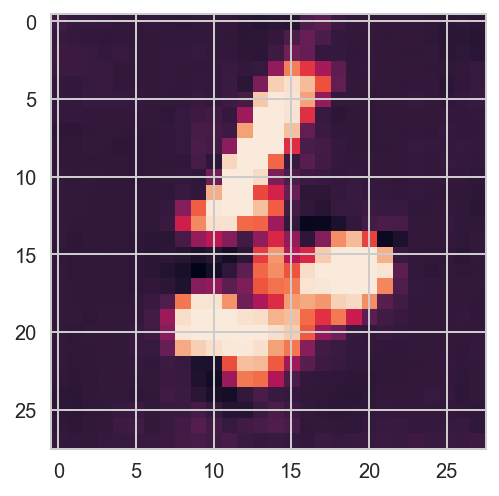

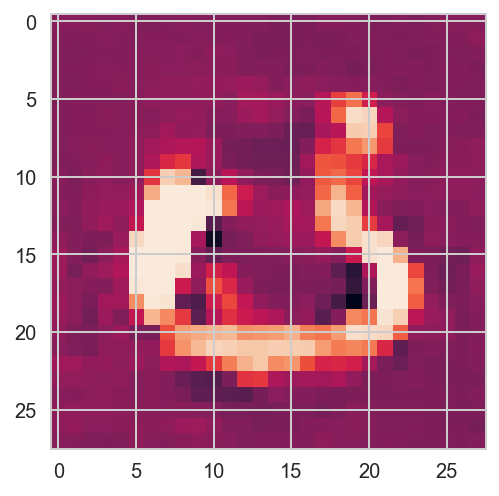

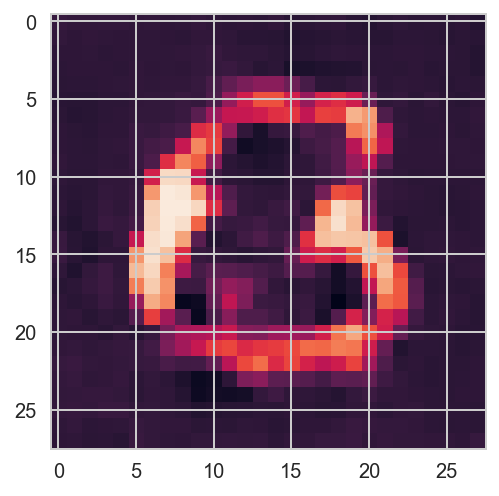

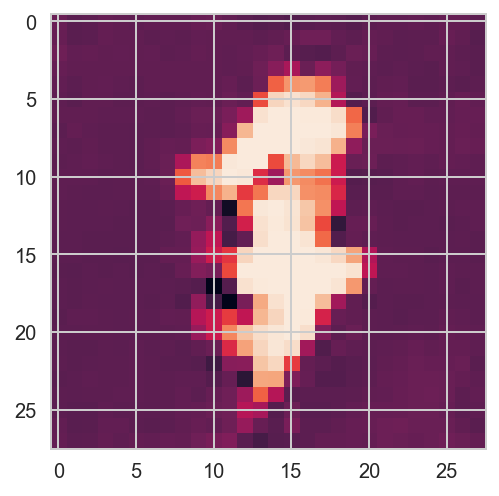

D_loss: 0.24797473311215848, G_loss: 4.267575344561419


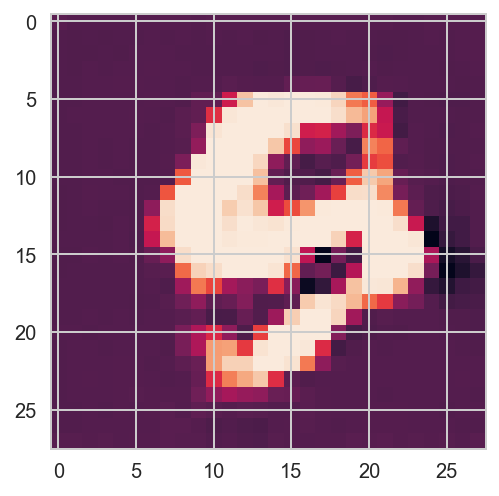

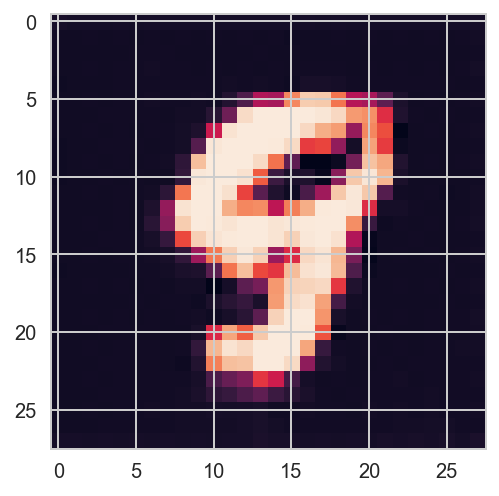

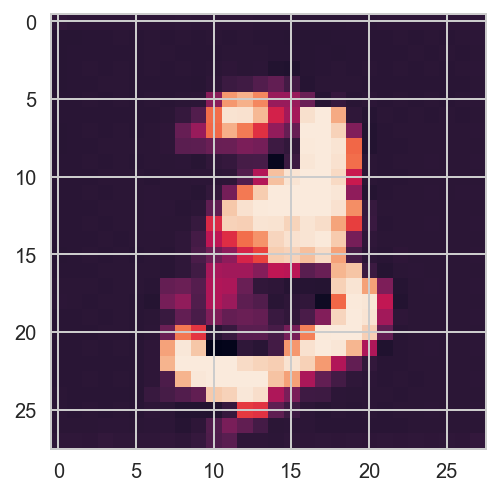

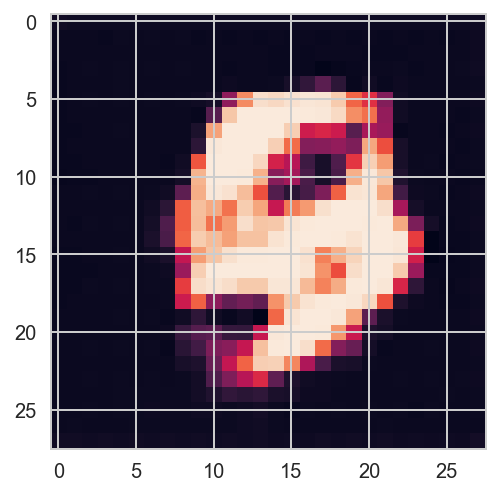

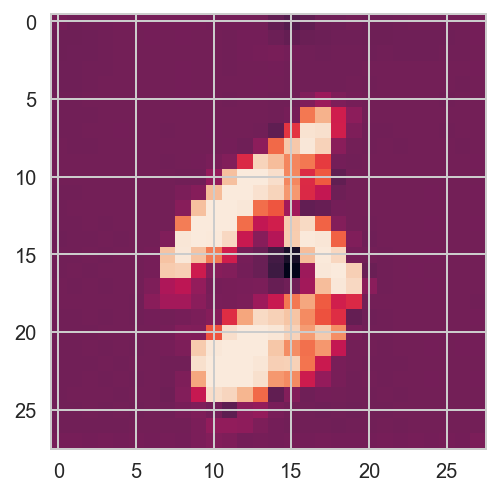

D_loss: 0.22659970955849387, G_loss: 4.7013997139630614


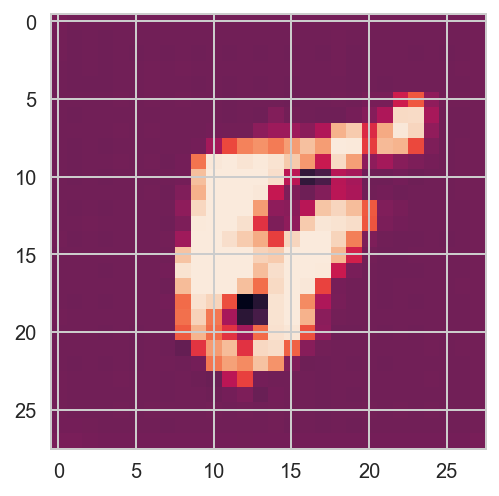

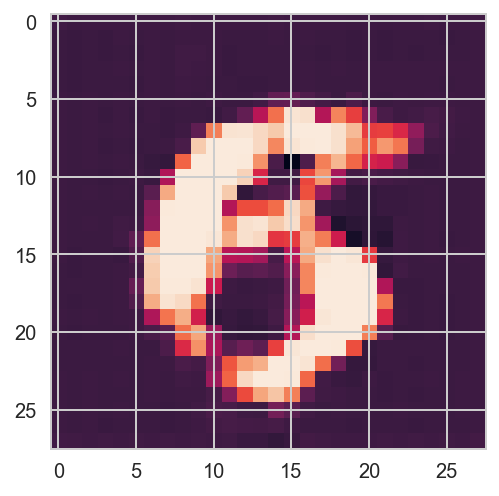

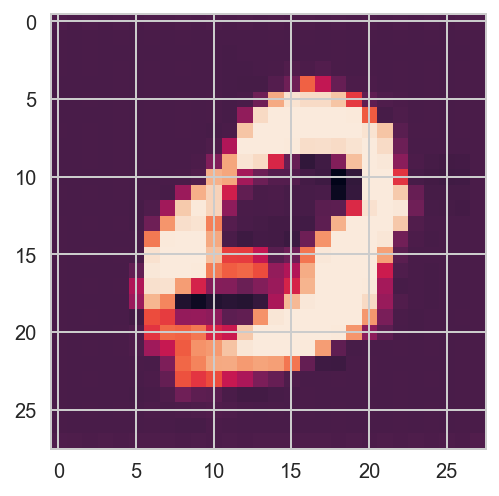

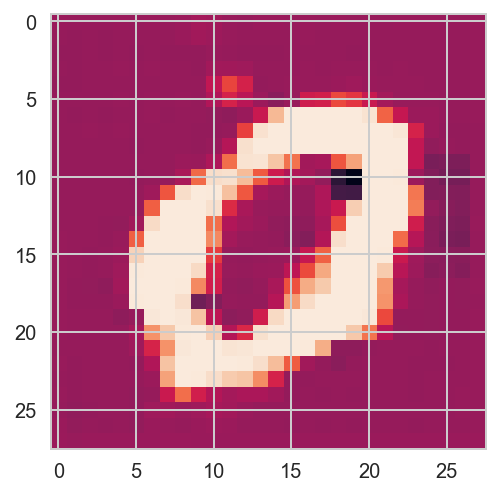

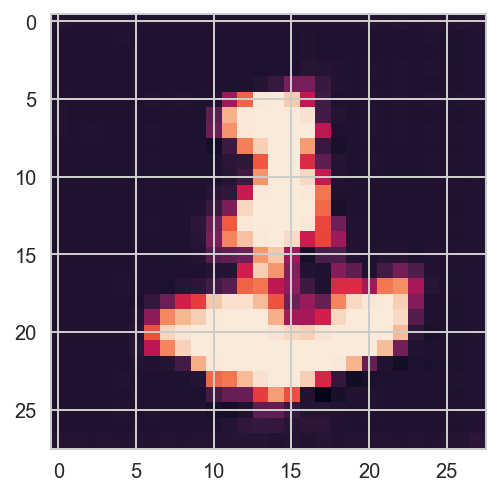

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(epoch):
        total_epoch = int(mnist.train.num_examples / batch_size)
        D_loss_total = 0
        G_loss_total = 0
        for batch in range(total_epoch):
            x, _ = mnist.train.next_batch(batch_size)            
            _, D_loss_temp = sess.run([D_train_step, D_loss], feed_dict = {X:x})
            _, G_loss_temp = sess.run([G_train_step, G_loss])
            
            D_loss_total += D_loss_temp
            G_loss_total += G_loss_temp
        
        samples = sess.run(G)
        print("D_loss: " + str(D_loss_total/total_epoch) + ", G_loss: " + str(G_loss_total/total_epoch))
        for i in range(5):
            img = samples[i]
            img = img.reshape(28,28)
            plt.imshow(img)
            plt.show()

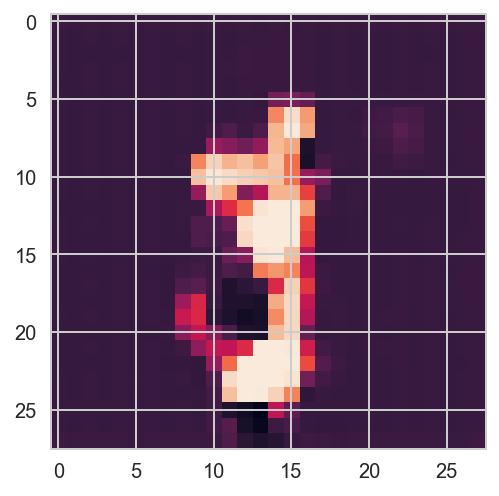

In [18]:
plt.imshow(samples[40].reshape(28,28))